In [30]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [31]:
df = pd.read_csv("../data/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [33]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [34]:
df['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [35]:
df['left'].unique()

array([1, 0], dtype=int64)

<Axes: xlabel='salary'>

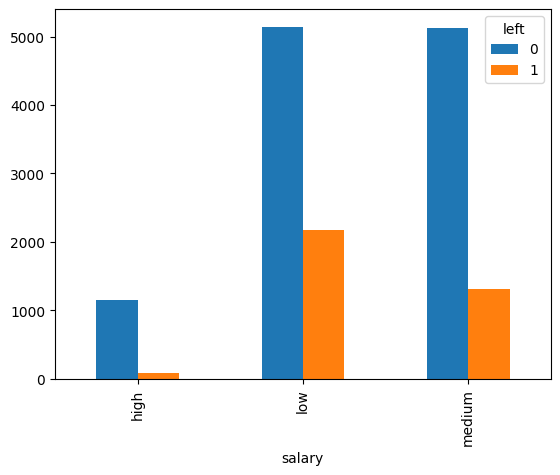

In [36]:
pd.crosstab(df.salary, df.left).plot(kind='bar')

<Axes: xlabel='Department'>

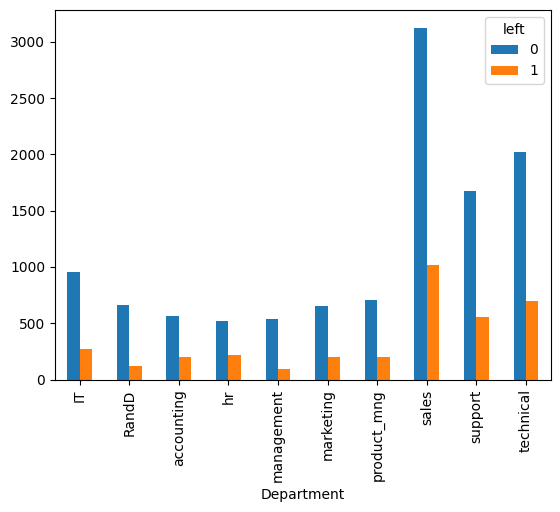

In [37]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [38]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [39]:
import numpy as np
salar_dummies = pd.get_dummies(subdf.salary, prefix="salary", dtype=np.uint8)
df_with_dummies = pd.concat([subdf, salar_dummies], axis='columns')
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [40]:
df_with_dummies.drop('salary', axis='columns', inplace=True)

In [41]:
X = df_with_dummies
y = df.left

In [42]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [43]:
X_train

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
14541,0.38,140,0,0,1,0
323,0.11,287,0,0,1,0
381,0.38,145,0,0,0,1
2224,0.25,133,0,0,1,0
874,0.14,282,0,0,1,0
...,...,...,...,...,...,...
10831,0.87,154,0,0,0,1
6966,0.90,185,0,0,1,0
9039,0.15,236,0,0,0,1
13485,0.48,186,1,0,0,1


In [44]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [45]:
prediction = model.predict(X_test)
prediction

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [46]:
model.score(X_test, y_test)

0.7773333333333333

In [47]:
X_test_pred = X_test.iloc[1].values 
X_test_pred

array([  0.61, 255.  ,   0.  ,   0.  ,   0.  ,   1.  ])

In [48]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, prediction)
accuracy

0.7773333333333333

In [49]:
model.predict([X_test_pred])

c:\Users\Thoyajaksha Kashyap\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

  0%|          | 0/31 [00:00<?, ?it/s]c:\Users\Thoyajaksha Kashyap\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Thoyajaksha Kashyap\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentati

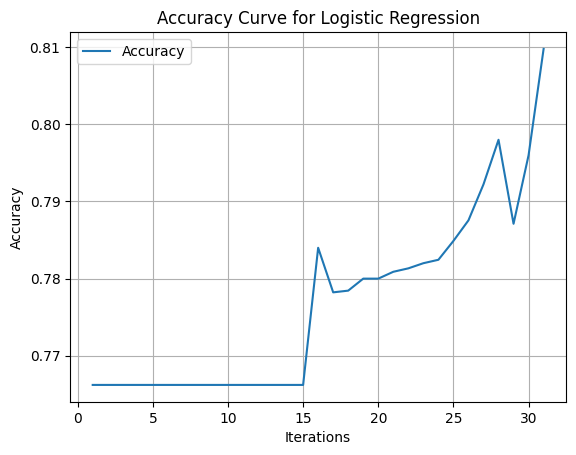

In [57]:
from tqdm._tqdm import tqdm
accuracies = []
iterations = np.arange(1, 32)

for i in tqdm(iterations):
    temp_model = LogisticRegression(max_iter=i)
    temp_model.fit(X_train, y_train)
    y_pred_temp = temp_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_temp)
    accuracies.append(accuracy)

# Plot the accuracy curve
plt.plot(iterations, accuracies, label='Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


In [51]:
temp_model.score(X_test, y_test)

0.8097777777777778

In [52]:
X_test_pred = X_test.iloc[3].values 
temp_model.predict([X_test_pred])

c:\Users\Thoyajaksha Kashyap\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [53]:
y_test

11292    0
11480    0
5498     0
2946     0
14722    1
        ..
14724    1
4816     0
181      1
10266    0
10931    0
Name: left, Length: 4500, dtype: int64